# Wizualizacje stacji dla całej Polski i województwa podkarpackiego

In [64]:
import urllib.request
import geopandas as gpd
import ssl
import certifi
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [65]:
url = "https://raw.githubusercontent.com/ppatrzyk/polska-geojson/master/wojewodztwa/wojewodztwa-medium.geojson"
ctx = ssl.create_default_context(cafile=certifi.where())

with urllib.request.urlopen(url, context=ctx) as response:
    voivodeships_gdf = gpd.read_file(response)
podkarpackie_border = voivodeships_gdf[voivodeships_gdf["nazwa"] == "podkarpackie"]

In [66]:
# Convert the DataFrame into a dictionary
file_path = "data/localization/unfiltered_localization_data.parquet"
df = pq.read_table(file_path).to_pandas()
data_dict = df.to_dict(orient='list')
poland_polygon = voivodeships_gdf.geometry.unary_union
filtered_poland_coordinates = [coordinates for coordinates in data_dict["Coordinates"] if Point(coordinates).within(poland_polygon)]

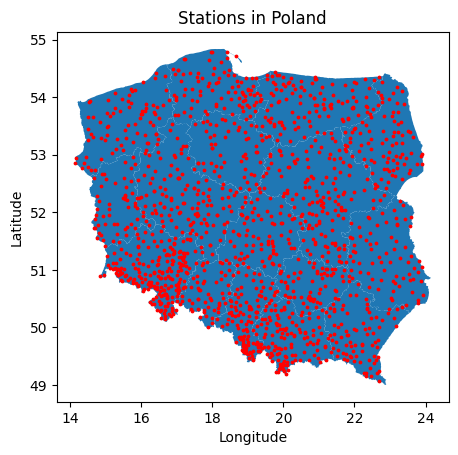

In [67]:
# Extract x and y coordinates from data_dict["Coordinates"]
x_coords = [coord[0] for coord in filtered_poland_coordinates]
y_coords = [coord[1] for coord in filtered_poland_coordinates]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the GeoDataFrame
voivodeships_gdf.plot(ax=ax)

# Plot the scatter plot
ax.scatter(x_coords, y_coords, color="red", s=3)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Stations in Poland')

plt.show()

In [68]:
# Convert the DataFrame into a dictionary
file_path = "data/localization/unfiltered_localization_data.parquet"
df = pq.read_table(file_path).to_pandas()
data_dict = df.to_dict(orient='list')
podkarpackie_polygon = podkarpackie_border.geometry.unary_union
filtered_podkarpackie_coordinates = [coordinates for coordinates in data_dict["Coordinates"] if Point(coordinates).within(podkarpackie_polygon)]

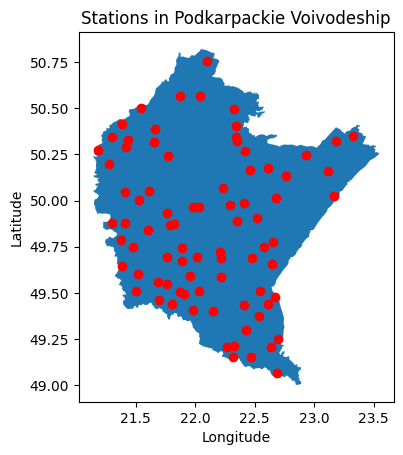

In [69]:
# Extract x and y coordinates from data_dict["Coordinates"]
x_coords = [coord[0] for coord in filtered_podkarpackie_coordinates]
y_coords = [coord[1] for coord in filtered_podkarpackie_coordinates]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the GeoDataFrame
podkarpackie_border.plot(ax=ax)

# Plot the scatter plot
ax.scatter(x_coords, y_coords, color="red")

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Stations in Podkarpackie Voivodeship')

plt.show()
